In [ ]:
표본의 크기가 늘어나면 추정의 정확도가 올라가서 신뢰구간은 좁아진다. 
표본의 표준편차가 크면 표본평균의 불확실성이 커지므로 신뢰구간이 넓어집니다.

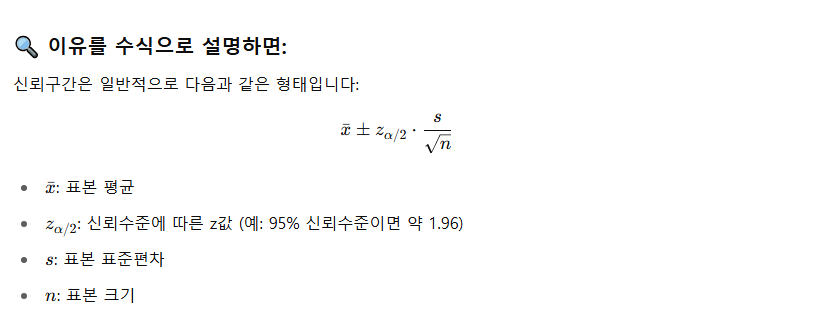

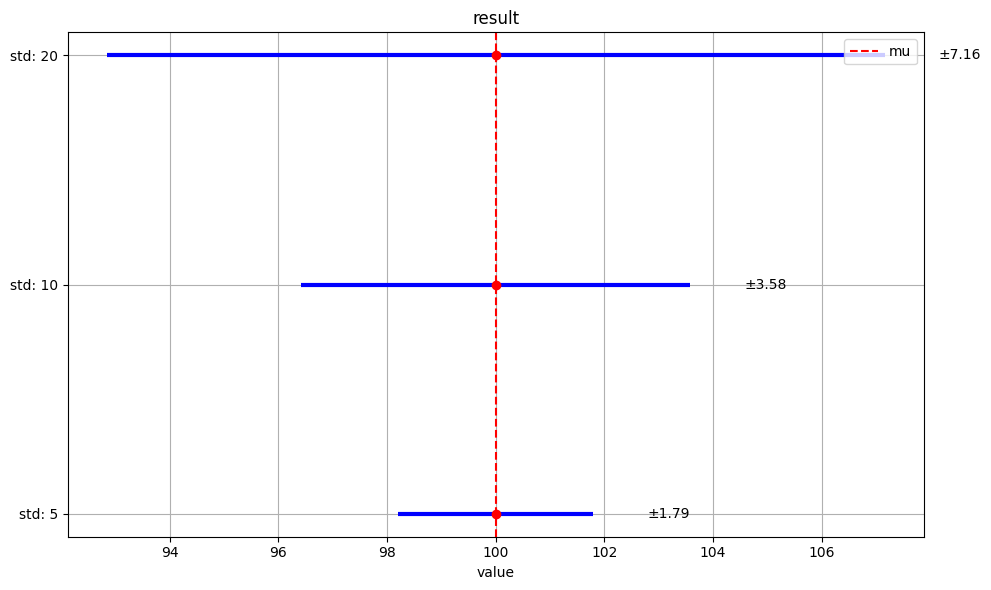

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 기본 설정
mu = 100          # 모집단 평균
n = 30            # 표본 크기
conf_level = 0.95
z = norm.ppf(1 - (1 - conf_level) / 2)  # z 값 (95% 신뢰수준)

# 표준편차 리스트
std_devs = [5, 10, 20]

# 시각화
plt.figure(figsize=(10, 6))
for i, sigma in enumerate(std_devs):
    se = sigma / np.sqrt(n)  # 표준오차
    lower = mu - z * se
    upper = mu + z * se

    plt.hlines(y=i, xmin=lower, xmax=upper, color='b', linewidth=3)
    plt.plot(mu, i, 'ro')  # 평균 위치
    plt.text(upper + 1, i, f"±{round(z * se, 2)}", va='center', fontsize=10)

plt.yticks(ticks=range(len(std_devs)), labels=[f"std: {s}" for s in std_devs])
plt.axvline(mu, color='r', linestyle='--', label="mu")
plt.title("result")
plt.xlabel("value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


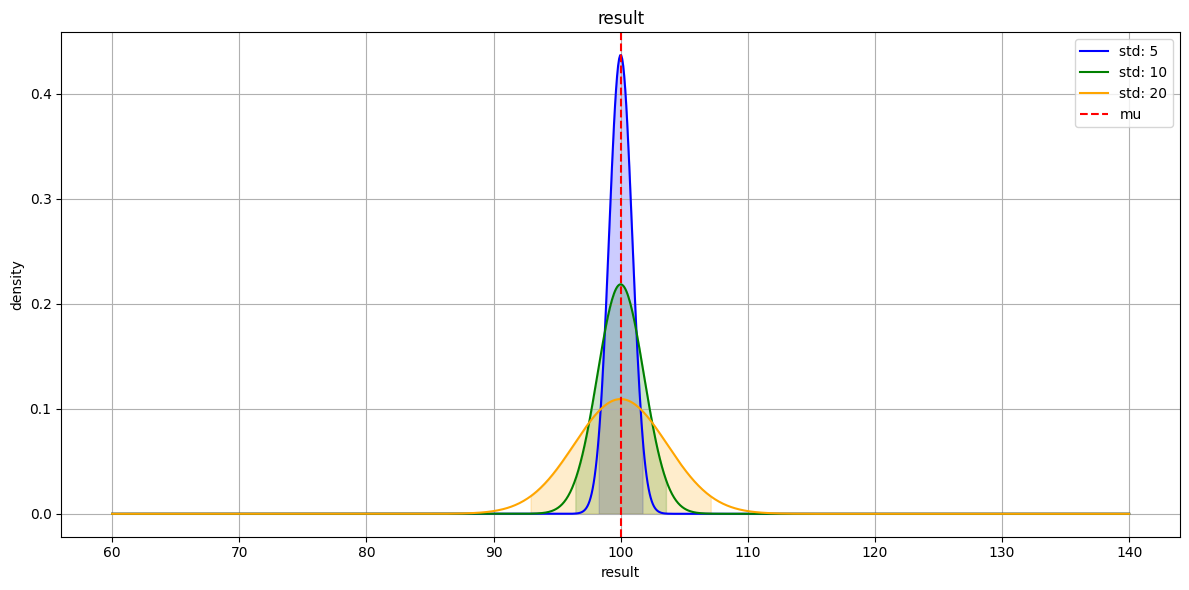

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 기본 설정
mu = 100          # 모집단 평균
n = 30            # 표본 크기
conf_level = 0.95
z = norm.ppf(1 - (1 - conf_level) / 2)  # z 값

# 표준편차 리스트
std_devs = [5, 10, 20]
colors = ['blue', 'green', 'orange']

# x축 범위
x = np.linspace(60, 140, 1000)

# 시각화
plt.figure(figsize=(12, 6))

for sigma, color in zip(std_devs, colors):
    se = sigma / np.sqrt(n)
    y = norm.pdf(x, mu, se)
    plt.plot(x, y, label=f'std: {sigma}', color=color)
    
    # 신뢰구간 음영
    lower = mu - z * se
    upper = mu + z * se
    plt.fill_between(x, y, where=(x >= lower) & (x <= upper), color=color, alpha=0.2)

# 평균 선
plt.axvline(mu, color='red', linestyle='--', label='mu')

plt.title("result")
plt.xlabel("result")
plt.ylabel("density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

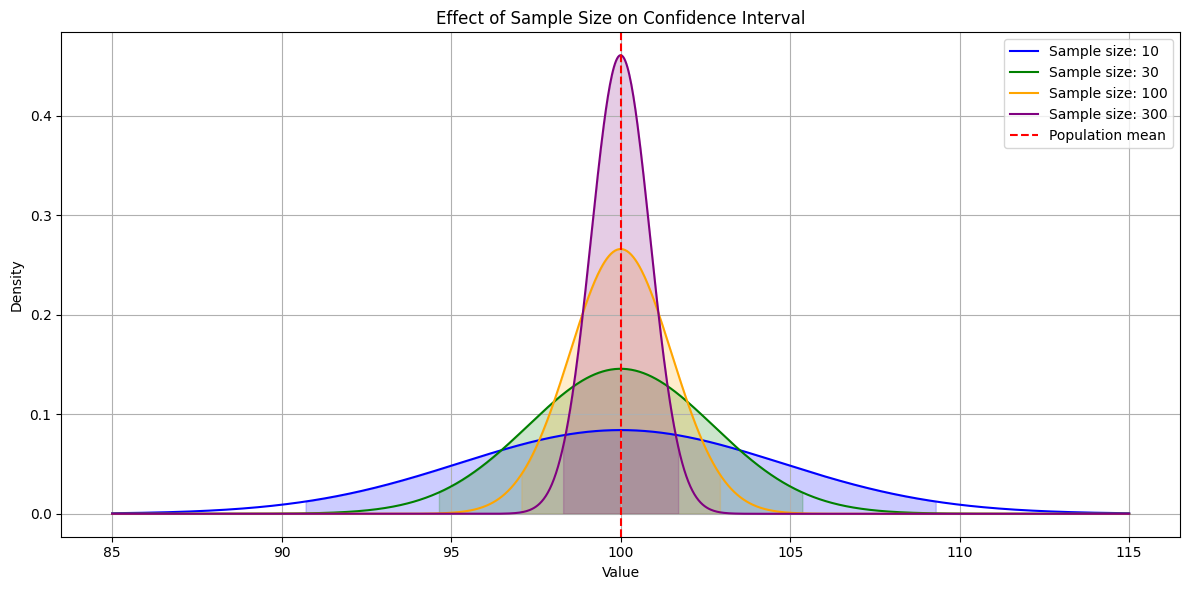

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Population settings
mu = 100          # Population mean
sigma = 15        # Fixed population standard deviation
conf_level = 0.95
z = norm.ppf(1 - (1 - conf_level) / 2)

# Different sample sizes
sample_sizes = [10, 30, 100, 300]
colors = ['blue', 'green', 'orange', 'purple']

# x-axis range
x = np.linspace(85, 115, 1000)

# Plotting
plt.figure(figsize=(12, 6))

for n, color in zip(sample_sizes, colors):
    se = sigma / np.sqrt(n)  # Standard error
    y = norm.pdf(x, mu, se)
    lower = mu - z * se
    upper = mu + z * se

    plt.plot(x, y, label=f'Sample size: {n}', color=color)
    plt.fill_between(x, y, where=(x >= lower) & (x <= upper), color=color, alpha=0.2)

# Mean line
plt.axvline(mu, color='red', linestyle='--', label='Population mean')

plt.title("Effect of Sample Size on Confidence Interval")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

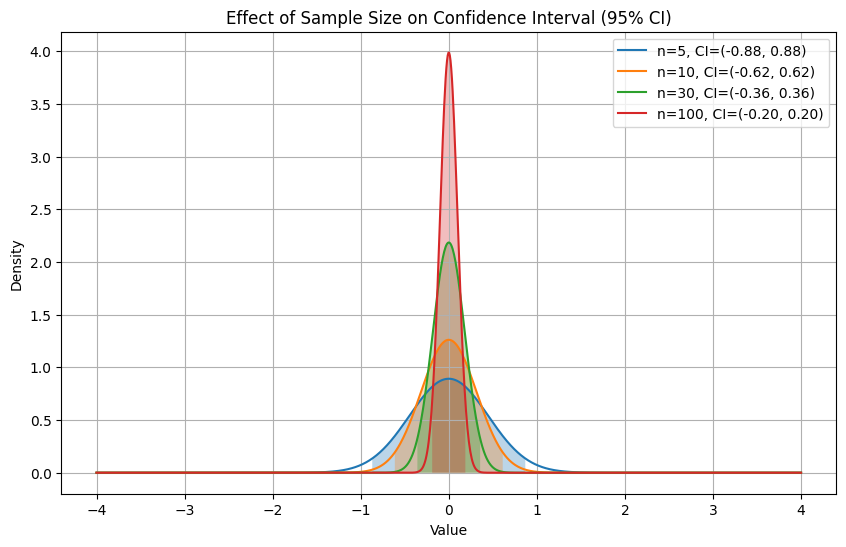

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Settings
mu = 0  # population mean
sigma = 1  # population standard deviation
confidence = 0.95
z = norm.ppf(1 - (1 - confidence) / 2)

# Sample sizes to compare
sample_sizes = [5, 10, 30, 100]
x = np.linspace(-4, 4, 1000)

# Plot
plt.figure(figsize=(10, 6))

for n in sample_sizes:
    se = sigma / np.sqrt(n)
    ci_lower = mu - z * se
    ci_upper = mu + z * se

    # Normal distribution curve
    y = norm.pdf(x, mu, se)
    plt.plot(x, y, label=f'n={n}, CI=({ci_lower:.2f}, {ci_upper:.2f})')
    plt.fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), alpha=0.3)

plt.title('Effect of Sample Size on Confidence Interval (95% CI)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
